# K-means Clustering: An In-depth Exploration

## Introduction
K-means clustering serves as one of the foundational algorithms in unsupervised machine learning. This project aims to explore K-means in a comprehensive manner, focusing on its mathematical framework, practical applications, and optimization techniques.

### About K-means Algorithm
K-means clustering is designed to partition a given dataset into \( K \) distinct clusters. The algorithm iteratively assigns each data point to the nearest centroid and recalibrates the centroids until convergence is achieved. K-means finds extensive applications in various domains, including but not limited to market segmentation, data compression, and image recognition.

### Objective
The primary objective of this project is to elucidate the mechanics of the K-means algorithm. This involves deriving the algorithm from its mathematical roots, implementing it in Python both from scratch and using standard libraries, and applying it to real-world scenarios, such as image clustering.


In [1]:
#%pip install numpy pandas matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

## Overview
Before delving into the intricacies of the K-means algorithm, it's imperative to prepare the dataset that will be used for experimentation. This step involves importing required libraries, loading or generating datasets, and conducting an initial exploration to understand the data's structure and attributes.

### Libraries and Packages
To simplify data manipulation and visualization in this project, packages like Pandas, NumPy, and Matplotlib will be used.

### Datasets
For a balanced approach, this project will utilize both synthetic and real-world datasets. The synthetic dataset will be generated using `sklearn.datasets.make_blobs`, while the real-world dataset will be the Iris dataset.

### Data Exploration
Initial data exploration is conducted to gain insights into the dataset's characteristics. This involves checking for missing values, understanding data types, and visualizing the distribution of data points.


In [2]:
# Libraries for Data Preparation
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

# Synthetic Dataset Generation
synthetic_data, synthetic_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
synthetic_df = pd.DataFrame(synthetic_data, columns=['Feature_1', 'Feature_2'])

# Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Data Exploration
print("=== Synthetic Dataset ===")
print(synthetic_df.head())
print("\n=== Iris Dataset ===")
print(iris_df.head())

=== Synthetic Dataset ===
   Feature_1  Feature_2
0   0.428577   4.973997
1   1.619909   0.067645
2   1.432893   4.376792
3  -1.578462   3.034458
4  -1.658629   2.267460

=== Iris Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Mathematical Concepts Behind K-means Clustering

Understanding the mathematical foundation of the K-means algorithm is essential for its effective application and optimization. This section aims to provide an in-depth explanation of the mathematical principles that drive the algorithm, followed by its Pythonic implementation from scratch.

## Objective Function
The objective of K-means clustering is to minimize the sum of squared distances between each data point and the centroid of its cluster. Mathematically, this is represented as:

$J(C, \mu) = \sum_{k=1}^{K} \sum_{x \in C_k} ||x - \mu_k||^2$

Where:
- $J(C, \mu)$ is the objective function.
- $K$ is the number of clusters.
- $C_k$ is the $k^{th}$ cluster.
- $\mu_k$ is the centroid of the $ k^{th}$ cluster.
- $x$ is a data point in cluster $C_k $.

## Algorithm Pseudocode
The K-means algorithm can be summarized with the following pseudocode:
1. **Initialize centroids** $\mu_1, \mu_2, ..., \mu_K$ randomly from the data points.
2. **Repeat until convergence:**
    1. **Assignment Step**: Assign each data point $x $ to the nearest centroid $\mu_k$, forming $K $ clusters.
        
        $C_k = \{ x : ||x - \mu_k||^2 \leq ||x - \mu_j||^2 \; \text{for all} \; 1 \leq j \leq K \}$
    2. **Update Step**: Calculate the new centroid $\mu_k$ of each cluster $ C_k $.
    
        $\mu_k = \frac{1}{|C_k|} \sum_{x \in C_k} x$

Let's use these concepts to create a function implementing k-means from scratch:

In [3]:
# Initialize centroids randomly from the data points
def initialize_centroids(X, K):
    random_indices = np.random.choice(X.shape[0], size=K, replace=False)
    return X[random_indices]

# Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Update the centroids based on cluster assignments
def update_centroids(X, clusters, K):
    new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
    return new_centroids

# K-means 
def kmeans_from_scratch(X, K, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    centroids = initialize_centroids(X, K)
    
    for i in range(max_iters):
        # Step 2.1: Assignment Step
        clusters = assign_clusters(X, centroids)
        
        # Step 2.2: Update Step
        new_centroids = update_centroids(X, clusters, K)
        for k in range(K):
            points_in_cluster = X[clusters == k]
            # Check if the cluster has points. If not, keep the old centroid.
            if points_in_cluster.shape[0] > 0:
                new_centroids[k] = points_in_cluster.mean(axis=0)
            else:
                new_centroids[k] = centroids[k]        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    inertia = np.sum([np.linalg.norm(X[i] - centroids[clusters[i]])**2 for i in range(len(X))])
    return centroids, clusters, inertia



# Implementing K-means: From Scratch to Libraries

## Overview
Now we will implement the K-means algorithm. We will start with the from-scratch implementation defined above, free from third-party libraries. This will be an excellent opportunity to observe the algorithm's behavior at each iteration and assess its performance. Following this, we'll  use `sklearn` to execute K-means, offering us a chance to compare and contrast both methods.

### K-means from Scratch
We've already laid the groundwork by designing the K-means algorithm without relying on specialized libraries. We'll run this on both the synthetic and Iris datasets to evaluate its efficacy. Each step of the algorithm will be visualized to provide a comprehensive understanding of its inner workings.

### K-means with Libraries
After the manual implementation, we'll employ `sklearn`'s K-means function to perform clustering on the same datasets. This will serve as a benchmark for our custom implementation and shed light on any differences in performance or outcomes.

### Visualization
The algorithm's progress will be captured through plots at key iterations, and metrics will be used to assess its performance.


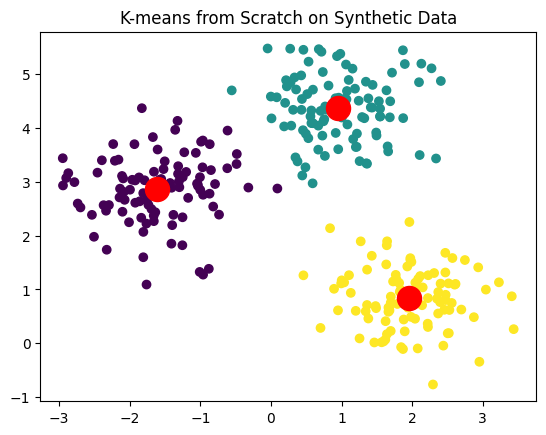

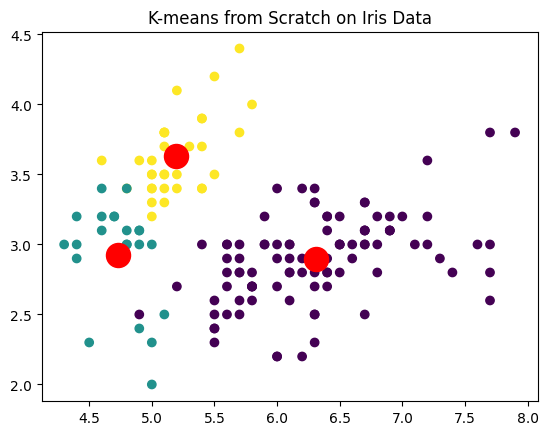

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run K-means from scratch
centroids_synthetic, clusters_synthetic, _ = kmeans_from_scratch(synthetic_data, 3)

plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=clusters_synthetic, cmap='viridis')
plt.scatter(centroids_synthetic[:, 0], centroids_synthetic[:, 1], s=300, c='red')
plt.title('K-means from Scratch on Synthetic Data')
plt.show()

centroids_iris, clusters_iris, _ = kmeans_from_scratch(iris_data.data, 3)

plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=clusters_iris, cmap='viridis')
plt.scatter(centroids_iris[:, 0], centroids_iris[:, 1], s=300, c='red')
plt.title('K-means from Scratch on Iris Data')
plt.show()


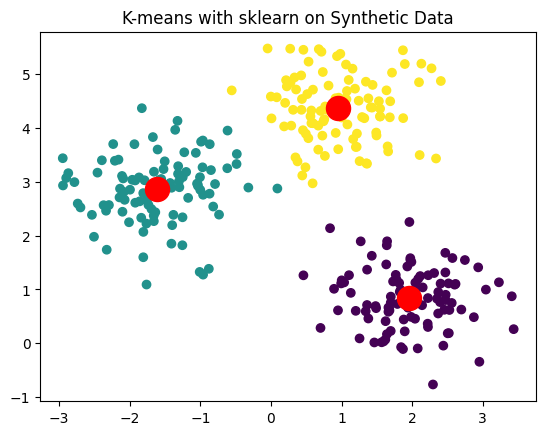

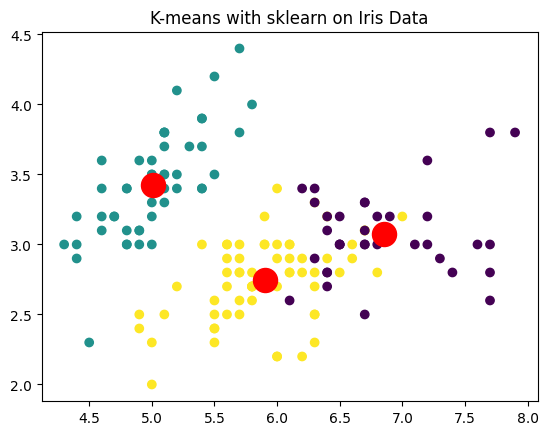

In [5]:
# Run K-means with sklearn
kmeans_synthetic_sklearn = KMeans(n_clusters=3, n_init=10).fit(synthetic_data)

plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=kmeans_synthetic_sklearn.labels_, cmap='viridis')
plt.scatter(kmeans_synthetic_sklearn.cluster_centers_[:, 0], kmeans_synthetic_sklearn.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means with sklearn on Synthetic Data')
plt.show()

kmeans_iris_sklearn = KMeans(n_clusters=3, n_init=10).fit(iris_data.data)

plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=kmeans_iris_sklearn.labels_, cmap='viridis')
plt.scatter(kmeans_iris_sklearn.cluster_centers_[:, 0], kmeans_iris_sklearn.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means with sklearn on Iris Data')
plt.show()

# K-means on Image

Applying K-means clustering to image segmentation offers a compelling example of the algorithm's versatility. 
In image segmentation, the goal is to divide an image into segments or clusters that share similar characteristics, such as color.
Here, each pixel in the image is treated as a data point in a multi-dimensional space, typically Red-Green-Blue (RGB) or grayscale.

## Objective
We will start by displaying the original image to establish a baseline. Subsequently, we'll employ K-means clustering to segment the image. 
By doing this, we will showcase the algorithm's effectiveness in reducing the color space of the image while preserving its structure.

## Steps
1. **Load the Original Image**
2. **Apply K-means Algorithm**: We will use the K-means algorithm implemented from scratch to segment the image.
3. **Result Visualization**: Finally, the segmented image will be displayed alongside the original for comparison.



### Pseudocode for `apply_kmeans_on_image`

The function `apply_kmeans_on_image` takes the original image and the number of clusters (`n_clusters`) as input and returns the segmented image. Here's how it diverges from the standard K-means algorithm:

1. **Reshape the Image**: The original image is a 3D array (height, width, RGB). We reshape it into a 2D array where each row is a pixel with RGB values.
    ```
    pixels = image.reshape((-1, 3))
    ```

2. **Convert to Floating Point**: The pixel values are converted to floating point for more precise calculations.
    ```
    pixels = np.float32(pixels)
    ```

3. **Apply K-means**: Utilize the K-means algorithm implemented from scratch on the reshaped image data.
    ```
    centroids, clusters = kmeans_from_scratch(pixels, n_clusters)
    ```

4. **Map Clusters to Centroids**: Each pixel (now represented as a cluster) is mapped back to its centroid color.
    ```
    segmented_pixels = [centroids[cluster] for cluster in clusters]
    ```

5. **Reshape to Original Dimensions**: The segmented pixels are reshaped back to the original 3D array format.
    ```
    segmented_image = segmented_pixels.reshape(image.shape)
    ```

This function essentially adapts the standard K-means algorithm to work with image data by handling the reshaping and data type conversion steps.


In [6]:
import cv2

def apply_kmeans_on_image(image, n_clusters, resize_dim=(256, 256)):
    # Resize the image
    image = cv2.resize(image, resize_dim, interpolation=cv2.INTER_AREA)

    # Reshape the image to a 2D pixels array
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)
    
    # Apply K-means
    centroids, clusters, inertia = kmeans_from_scratch(pixels, n_clusters)
    
    # Map each cluster back to centroid
    segmented_pixels = np.array([centroids[cluster] for cluster in clusters])
    segmented_pixels = np.uint8(segmented_pixels)
    
    # Reshape back to the original
    segmented_image = segmented_pixels.reshape(image.shape)
    
    return segmented_image, inertia

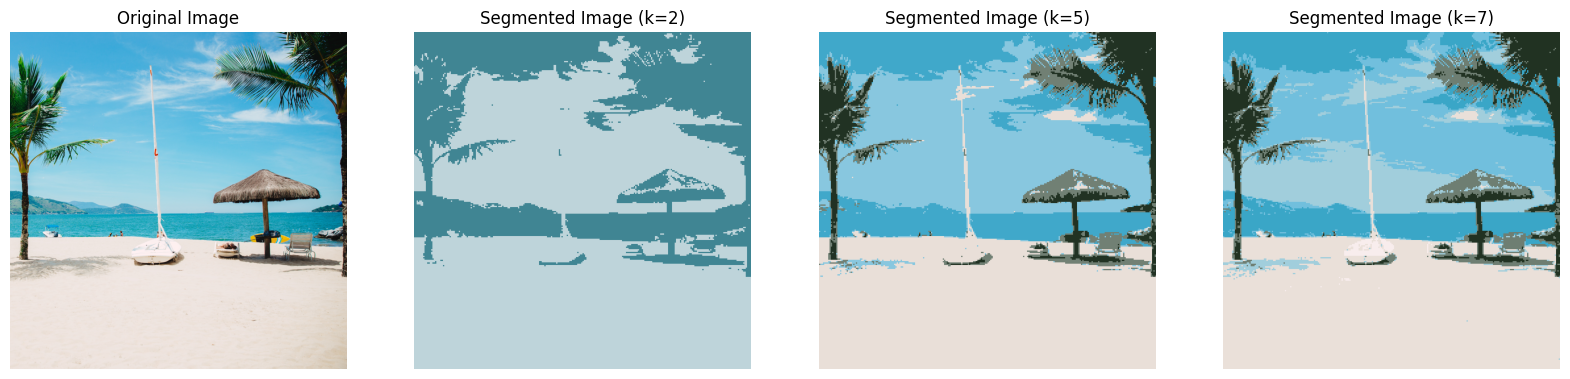

In [7]:
original_image = plt.imread('kmeans_original.jpg')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

k_values = [2, 5, 7]

for i, k in enumerate(k_values):
    segmented_image, _ = apply_kmeans_on_image(original_image, n_clusters=k)
    axs[i + 1].imshow(segmented_image)
    axs[i + 1].set_title(f'Segmented Image (k={k})')
    axs[i + 1].axis('off')

plt.show()


We can see what the original image looks like using k-means with 2,5, and 7 clusters - as expected, the more clusters we have, the more resemblance there is to the original. 

But which k would give us a result that is good enough in resemblance to the original, but not too complex in computation? 

## Finding the Optimal Number of Clusters: The Elbow Method

When applying the K-means algorithm, one pivotal decision to make is choosing the appropriate number of clusters \( K \). A wrong choice can lead to misleading insights. The Elbow Method is a popular technique to validate the optimal number of clusters mathematically.

### What is Inertia?

Inertia measures how far the points in a cluster are from the centroid of that cluster. It's calculated as the sum of squared distances from each point to its assigned centroid. Mathematically, it can be defined as:

$\text{Inertia} = \sum_{i=1}^{n} \min_{\mu_j \in C}(||x_i - \mu_j||^2)$

Where:
- $\text{Inertia}$ is the sum of squared distances for each point to its centroid.
- $n$ is the number of samples.
- $C $ is the set of cluster centroids $\mu_j$.
- $x_i$ is each data point.
- $\mu_j $ is the centroid of the cluster to which $x_i$ belongs.

### How Does the Elbow Method Work?

We calculate the inertia for various values of $K$ and plot it. The point at which the inertia starts to decrease at a linear rate is considered the optimal $K$. In other words, beyond this point, adding more clusters will not add significant value to your analysis, and you risk overfitting.

To visualize this, we plot a graph of the number of clusters against the corresponding inertia. The point where the inertia curve starts to bend, resembling an "elbow," usually indicates the optimal number of clusters.


In [8]:
def plot_elbow_method(image, max_k=10):
    inertias = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        _, inertia = apply_kmeans_on_image(image, n_clusters=k)
        inertias.append(inertia)
        
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    
    plt.show()

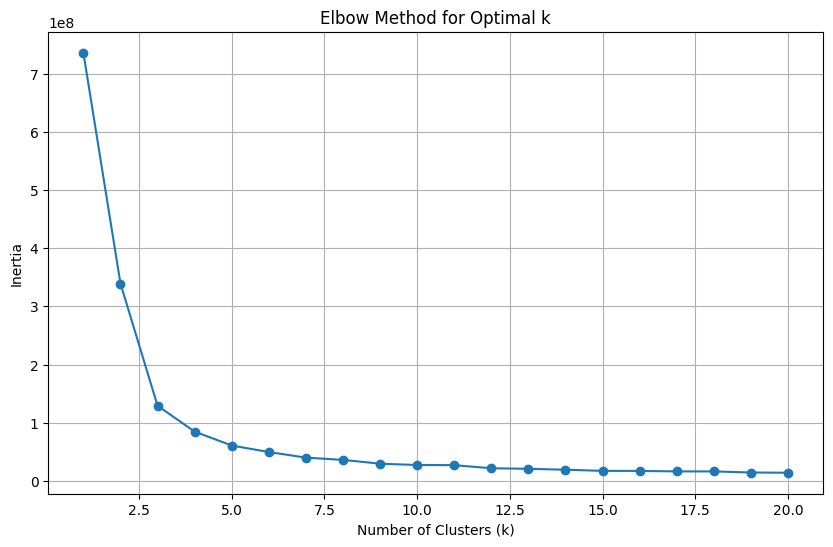

In [9]:
plot_elbow_method(original_image, max_k = 20)

As we can see, the elbow is arount k=4, and there isnt much improvement  after k=10. Based on this, we can say that for this image a k= yields a 'good enough' result with recognizable image and low computation and k=10 yields an even better result in terms of visual representation of the original image, after which we are unlikely to get much improvement, hence increasing the cost would not be worth it. 

Let's see what these values do for our image below:

C:\Users\fedas\AppData\Local\Temp\ipykernel_19064\1996028894.py:13: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
c:\Users\fedas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


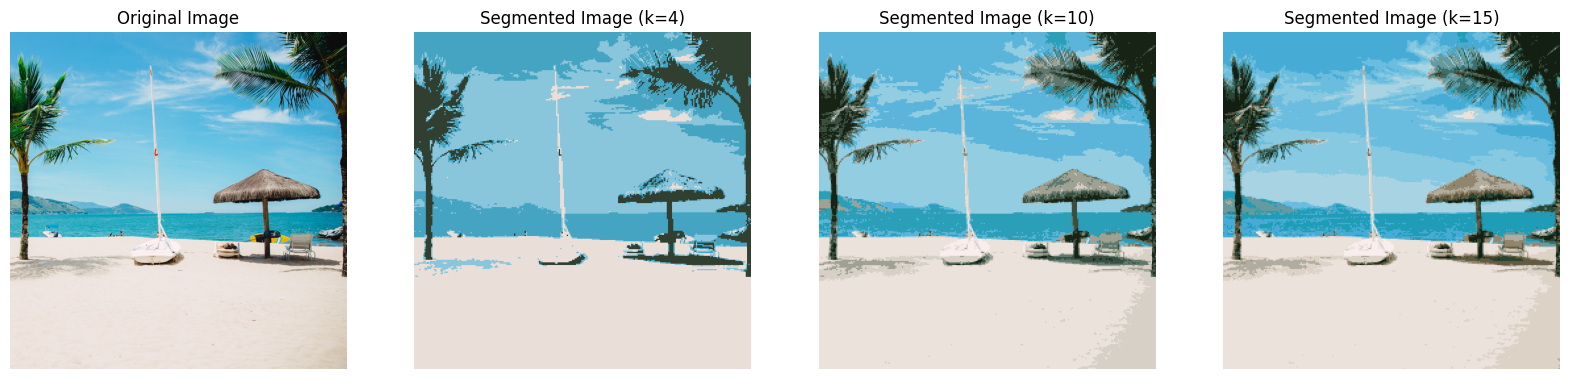

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

k_values = [4,10,15]

for i, k in enumerate(k_values):
    segmented_image, _ = apply_kmeans_on_image(original_image, n_clusters=k)
    axs[i + 1].imshow(segmented_image)
    axs[i + 1].set_title(f'Segmented Image (k={k})')
    axs[i + 1].axis('off')

plt.show()


We can truly see that while k=10 is much better than k=4, which is only enough to recognize the image shapes, k=15 does not yield any additional benefits compared to k=10, so we can use k=10 as a good balance between visuals and computation.

### Conclusion

In this mini-project, we explored the K-means clustering algorithm in-depth, both from a theoretical and practical perspective. We applied K-means on synthetic data, the well-known Iris dataset, and even on an image to demonstrate image segmentation.

The Elbow method helped us choose an optimal number of clusters, enhancing the algorithm's performance. The project showcased not only the versatility of K-means but also provided an under-the-hood look by implementing it from scratch.

This work serves as a comprehensive guide to understanding and applying K-means, making it a valuable addition to any data science portfolio.
